<a href="https://colab.research.google.com/github/Shivamtripathi13/Cross-Selling-Insurance/blob/master/Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

     |████████████████████████████████| 6.8MB 7.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 174kB 9.1MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from imblearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Insurance cross sell.csv")
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [ ]:
data[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


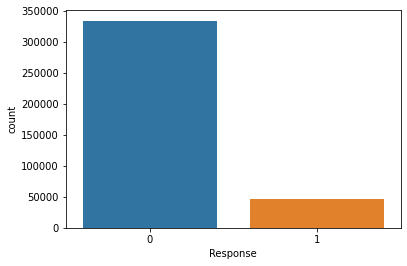

In [ ]:
sns.countplot(data.Response)

In [ ]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


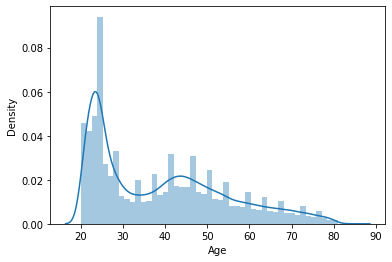

In [ ]:
sns.distplot(data.Age)

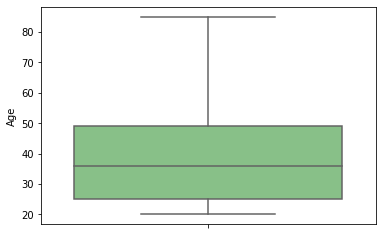

In [ ]:
sns.boxplot(y = 'Age', data = data,palette='Accent')

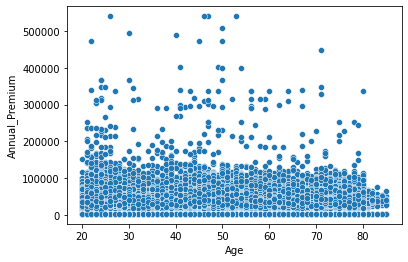

In [ ]:
sns.scatterplot(x=data['Age'],y=data['Annual_Premium'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


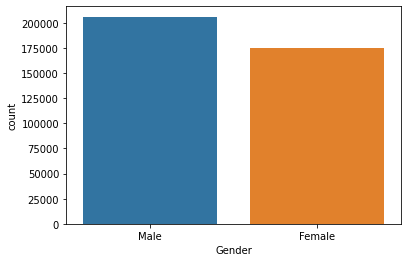

In [ ]:
sns.countplot(data.Gender)

In [ ]:
df = data.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

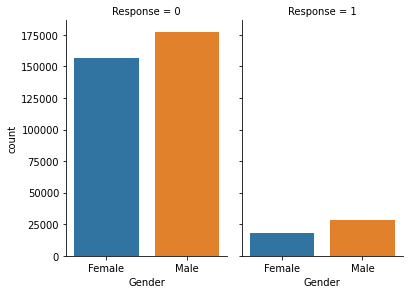

In [ ]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [ ]:
df = data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


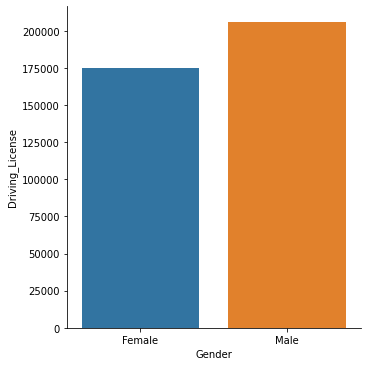

In [ ]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


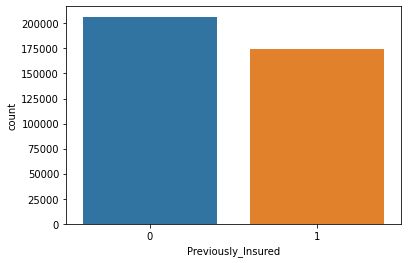

In [ ]:
sns.countplot(data.Previously_Insured)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


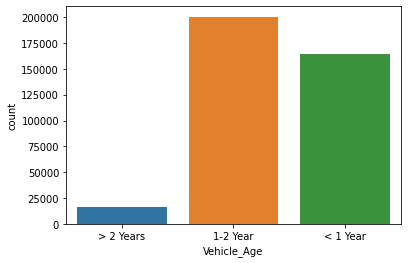

In [ ]:
sns.countplot(data.Vehicle_Age)

In [ ]:
df=data.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


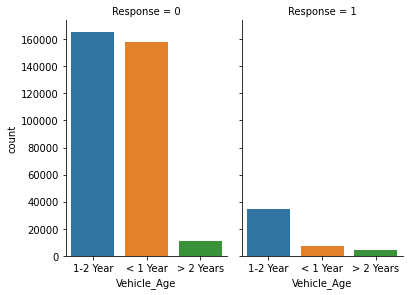

In [ ]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


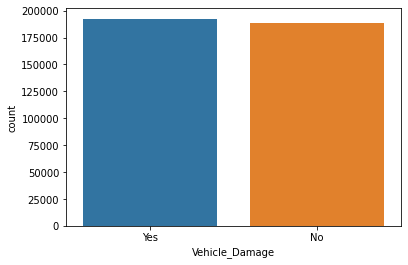

In [ ]:
sns.countplot(data.Vehicle_Damage)

In [ ]:
df=data.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

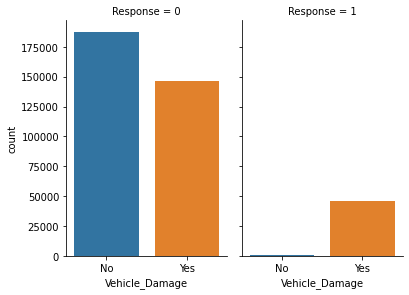

In [ ]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


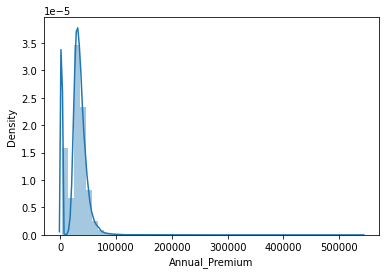

In [ ]:
sns.distplot(data.Annual_Premium)

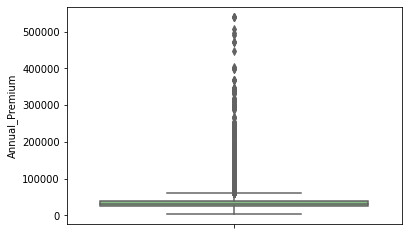

In [ ]:
sns.boxplot(y = 'Annual_Premium', data = data,palette='Accent')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


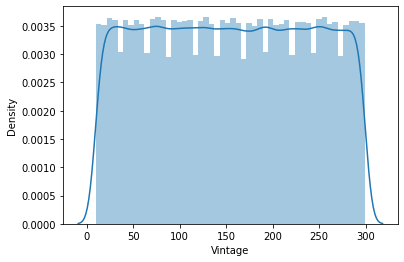

In [ ]:
sns.distplot(data.Vintage)

In [ ]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']


In [ ]:
data['Gender'] = data['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)


In [ ]:
data=pd.get_dummies(data,drop_first=True)

In [ ]:
data=data.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
data['Vehicle_Age_lt_1_Year']=data['Vehicle_Age_lt_1_Year'].astype('int')
data['Vehicle_Age_gt_2_Years']=data['Vehicle_Age_gt_2_Years'].astype('int')
data['Vehicle_Damage_Yes']=data['Vehicle_Damage_Yes'].astype('int')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
data[num_feat] = ss.fit_transform(data[num_feat])


mm = MinMaxScaler()
data[['Annual_Premium']] = mm.fit_transform(data[['Annual_Premium']])

In [ ]:
data=data.drop('id',axis=1)

In [ ]:
for column in cat_feat:
    data[column] = data[column].astype('str')

In [ ]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [ ]:
train_target=data['Response']
data=data.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(data,train_target, random_state = 0)

In [ ]:
x_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
216376,0,0.656117,1,46.0,0,0.025967,26.0,-0.063910,0,0,1
154701,1,1.107392,1,41.0,1,0.000000,12.0,-0.135619,0,0,1
186998,0,0.785053,1,30.0,1,0.070139,152.0,0.784650,0,0,0
280932,0,0.269309,1,48.0,0,0.000000,124.0,0.091460,0,0,1
47683,0,-0.826645,1,11.0,1,0.053405,152.0,-0.171474,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
359783,1,-0.762177,1,28.0,1,0.056914,152.0,0.784650,1,0,0
358083,0,0.913989,1,46.0,0,0.071327,26.0,-0.279037,0,1,1
152315,1,-1.084517,1,45.0,1,0.051662,160.0,-0.434408,1,0,0
117952,0,1.107392,1,43.0,0,0.059938,157.0,0.892214,0,1,1


In [ ]:
def runCV(algo, X, y):
  rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  cv_results = cross_val_score(algo, X, y, cv=5, n_jobs=-1)
  print(f"Mean: {cv_results.mean()}, Std: {cv_results.std()}, Min: {cv_results.min()}, Max: {cv_results.max()}")

def hyperParameter(algo, params, X, y):
  rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  grid = GridSearchCV(algo, param_grid=params, n_jobs=-1, cv=5, scoring= "accuracy")
  grid.fit(X,y)
  print('Best Score: ', grid.best_score_)
  print('Best Params: ', grid.best_params_)
  print('Cross validation on model with best params')
  runCV(grid.best_estimator_, X, y)
  return grid.best_estimator_

def plot_confusion_matrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

def metric(model):
  preds = model.predict(x_test)
  score = precision_recall_fscore_support(y_test, preds)
  print('accuracy: ', accuracy_score(y_test, preds))
  print('precision: ', score[0])
  print('recall: ', score[1])
  print('f1_score: ', score[2])
  print('support: ', score[3])
  print('AUC of ROC: ', roc_auc_score(y_test, preds))
  plot_confusion_matrix(y_test, preds)

Best Score:  0.6407387584689561
Best Params:  {'model__max_iter': 100, 'model__n_jobs': -1, 'model__penalty': 'none'}
Cross validation on model with best params
Mean: 0.6407807404254535, Std: 0.0016857984794005532, Min: 0.6385438897246615, Max: 0.6437392855893364
accuracy:  0.6386049245366192
precision:  [0.99363505 0.2497691 ]
recall:  [0.59192852 0.97284797]
f1_score:  [0.7418951  0.39748727]
support:  [83603 11675]
AUC of ROC:  0.7823882425251331


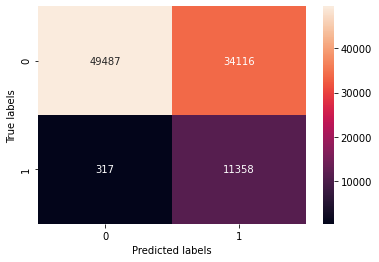

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
over = SMOTE(n_jobs=-1)

steps = [('over', over),  ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)

#log_params = {'model__penalty': ['none'], 'model__max_iter': [100, 200, 300, 400, 500], 'model__n_jobs': [-1]}

log_params = {'model__penalty': ['none'], 'model__max_iter': [100], 'model__n_jobs': [-1]}

model = hyperParameter(pipeline, log_params, x_train, y_train)

metric(model)

Best Score:  0.814204896604924
Best Params:  {'model__n_neighbors': 2}
Cross validation on model with best params
Mean: 0.8140649560359405, Std: 0.0010843127311276253, Min: 0.8129482559563377, Max: 0.8158520799076374
accuracy:  0.8143222989567371
precision:  [0.90921847 0.29598481]
recall:  [0.87584178 0.37379015]
f1_score:  [0.89221809 0.3303683 ]
support:  [83603 11675]
AUC of ROC:  0.6248159629528781


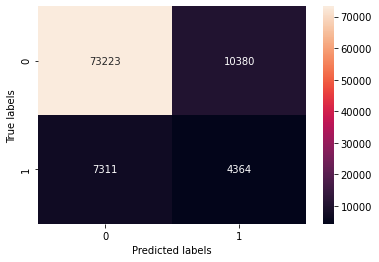

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
over = SMOTE(n_jobs=-1)

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

#params = {'model__n_neighbors': [2,3,4]}

params = {'model__n_neighbors': [2]}

model = hyperParameter(pipeline, params, x_train, y_train)

metric(model)

Best Score:  0.6396646916293023
Best Params:  {}
Cross validation on model with best params
Mean: 0.6396646916293023, Std: 0.0013692502970252037, Min: 0.6371969352412273, Max: 0.6411915965504574
accuracy:  0.6382480740569701
precision:  [0.99462452 0.25013156]
recall:  [0.59092377 0.97713062]
f1_score:  [0.74138047 0.39830316]
support:  [83603 11675]
AUC of ROC:  0.7840271958315482


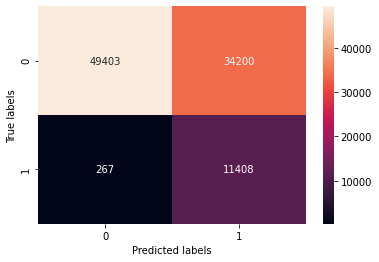

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
over = SMOTE(n_jobs=-1)

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {}

model = hyperParameter(pipeline, params, x_train, y_train)

metric(model)

Best Score:  0.8145442529207546
Best Params:  {}
Cross validation on model with best params
Mean: 0.8146946955424925, Std: 0.001420547128152936, Min: 0.8120736101878739, Max: 0.816394360284085
accuracy:  0.8146476626293583
precision:  [0.90743281 0.291507  ]
recall:  [0.87836561 0.35837259]
f1_score:  [0.89266265 0.32149992]
support:  [83603 11675]
AUC of ROC:  0.6183690999480286


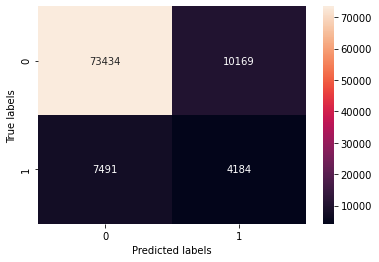

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
over = SMOTE(n_jobs=-1)
under = RandomUnderSampler()

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {}

model = hyperParameter(pipeline, params, x_train, y_train)

metric(model)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Score:  0.70669755978699
Best Params:  {}
Cross validation on model with best params
Mean: 0.6128236505973439, Std: 0.012134123996763144, Min: 0.5984676206136514, Max: 0.6328936780603855
accuracy:  0.8107013161485338
precision:  [0.91151698 0.29629155]
recall:  [0.86858127 0.39623126]
f1_score:  [0.88953132 0.33905013]
support:  [83603 11675]
AUC of ROC:  0.6324062671951595


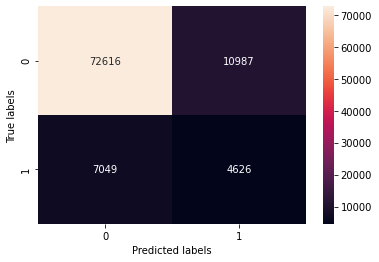

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
over = SMOTE(n_jobs=-1)
under = RandomUnderSampler()

steps = [('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {'model__degree': [2,3,4], 'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 'model__gamma': ['scale', 'auto']}


params = {'model__degree': [2], 'model__kernel': ['linear'], 'model__gamma': ['auto']}

params = {}

model = hyperParameter(pipeline, params, x_train, y_train)

metric(model)

Best Score:  0.8176334943698477
Best Params:  {'model__n_jobs': -1}
Cross validation on model with best params
Mean: 0.8182562362818565, Std: 0.0013114023470153684, Min: 0.8166742469299934, Max: 0.8199835569471898
accuracy:  0.8167362874955394
precision:  [0.92231956 0.32952269]
recall:  [0.86390441 0.47897216]
f1_score:  [0.8921568  0.39043463]
support:  [83603 11675]
AUC of ROC:  0.6714382840426026


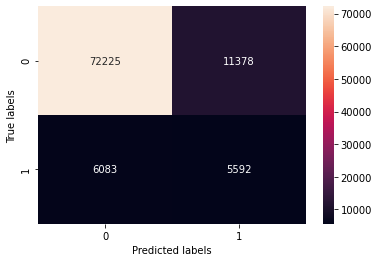

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
over = SMOTE(n_jobs=-1)
under = RandomUnderSampler()

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {'model__n_jobs': [-1]}

model = hyperParameter(pipeline, params, x_train, y_train)

metric(model)


Best Score:  0.7260864021035498
Best Params:  {}
Cross validation on model with best params
Mean: 0.7241971647344949, Std: 0.0031040896590548202, Min: 0.7197110170380996, Max: 0.7280901234999825
accuracy:  0.7249102625999706
precision:  [0.97334433 0.2902779 ]
recall:  [0.70582395 0.86158458]
f1_score:  [0.81827384 0.43425142]
support:  [83603 11675]
AUC of ROC:  0.7837042680634931


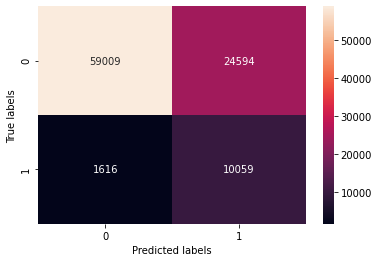

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
over = SMOTE(n_jobs=-1)
under = RandomUnderSampler()

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {}

model = hyperParameter(pipeline, params, x_train, y_train)

metric(model)

In [ ]:
import pickle
file = open('/content/model.pkl', 'wb')
pickle.dump(model, file)

file = open('/content/ss.pkl', 'wb')
pickle.dump(ss, file)

file = open('/content/mm.pkl', 'wb')
pickle.dump(mm, file)